In [1]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.preprocessing import preprocesar_datos, guardar_datos_preprocesados

# 1. Carga de datos
print('Cargando datos...')
df = pd.read_csv('remove_correlated_data.csv') # raw data

Cargando datos...


In [2]:
# 2. Información básica del dataset
print("=== Información básica del dataset ===")
df.info()

=== Información básica del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164629 entries, 0 to 164628
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Stock Item Key         164629 non-null  int64  
 1   Size                   116211 non-null  object 
 2   Calendar Month Number  164629 non-null  int64  
 3   Calendar Year          164629 non-null  int64  
 4   Month                  164629 non-null  object 
 5   State Province         164629 non-null  object 
 6   Unique_Customers       164629 non-null  int64  
 7   Total_Profit           164629 non-null  float64
 8   Avg_Monthly_Sales      164629 non-null  int64  
 9   Season                 164629 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 12.6+ MB


In [3]:
# 3. Visualización de las primeras filas
print("=== Primeras 5 filas ===")
df.head()

=== Primeras 5 filas ===


,Stock Item Key,Size,Calendar Month Number,Calendar Year,Month,State Province,Unique_Customers,Total_Profit,Avg_Monthly_Sales,Season
0,163,NaN,1,2014,January,California,1,102.0,7,Winter
1,74,S,3,2014,March,Louisiana,1,288.0,96,Spring
2,172,NaN,11,2015,November,Minnesota,1,51.0,7,Fall
3,73,M,11,2015,November,West Virginia,1,36.0,81,Fall
4,181,NaN,2,2016,February,New York,1,25.5,6,Winter


In [4]:
# 4. Análisis de valores nulos
print("=== Análisis de valores nulos ===")
nulos = df.isnull().sum()
nulos[nulos > 0]

=== Análisis de valores nulos ===


Size    48418
dtype: int64

In [5]:
# 5. Estadísticas descriptivas
print("=== Estadísticas descriptivas ===")
df.describe()

=== Estadísticas descriptivas ===


,Stock Item Key,Calendar Month Number,Calendar Year,Unique_Customers,Total_Profit,Avg_Monthly_Sales
count,164629.000000,164629.000000,164629.000000,164629.000000,164629.000000,164629.000000
mean,110.773418,6.078000,2014.293879,1.302304,520.741673,53.888410
std,63.705893,3.437352,1.006282,0.600450,1144.805918,62.484856
min,1.000000,1.000000,2013.000000,1.000000,-903.000000,5.000000
25%,56.000000,3.000000,2013.000000,1.000000,67.500000,7.000000
50%,110.000000,6.000000,2014.000000,1.000000,160.000000,8.000000
75%,166.000000,9.000000,2015.000000,1.000000,518.400000,86.000000
max,227.000000,12.000000,2016.000000,7.000000,30360.000000,333.000000


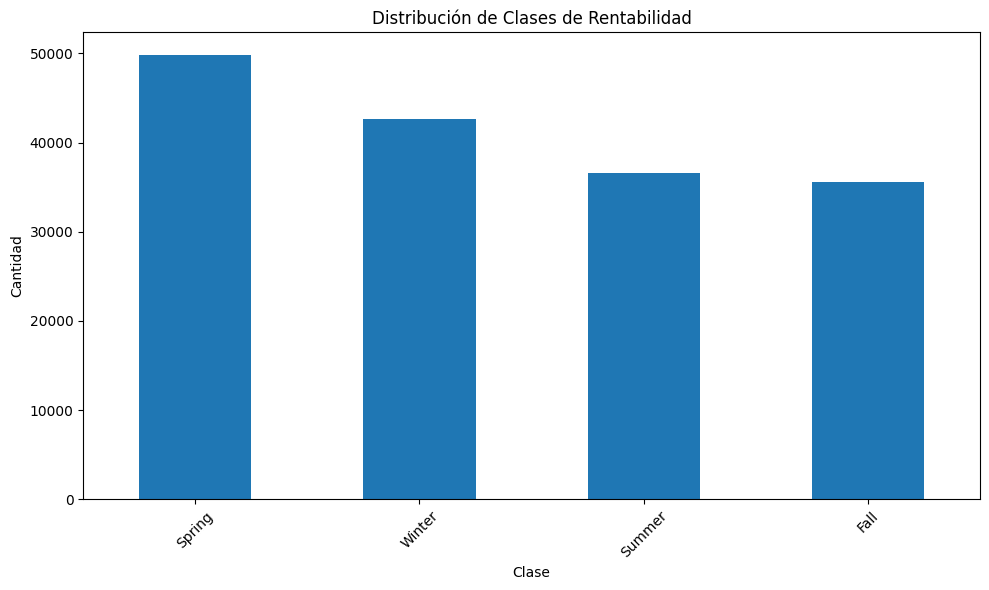

In [6]:
# 6. Visualización de la distribución de clases
plt.figure(figsize=(10, 6))
df['Season'].value_counts().plot(kind='bar')
plt.title('Distribución de Clases de Rentabilidad')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

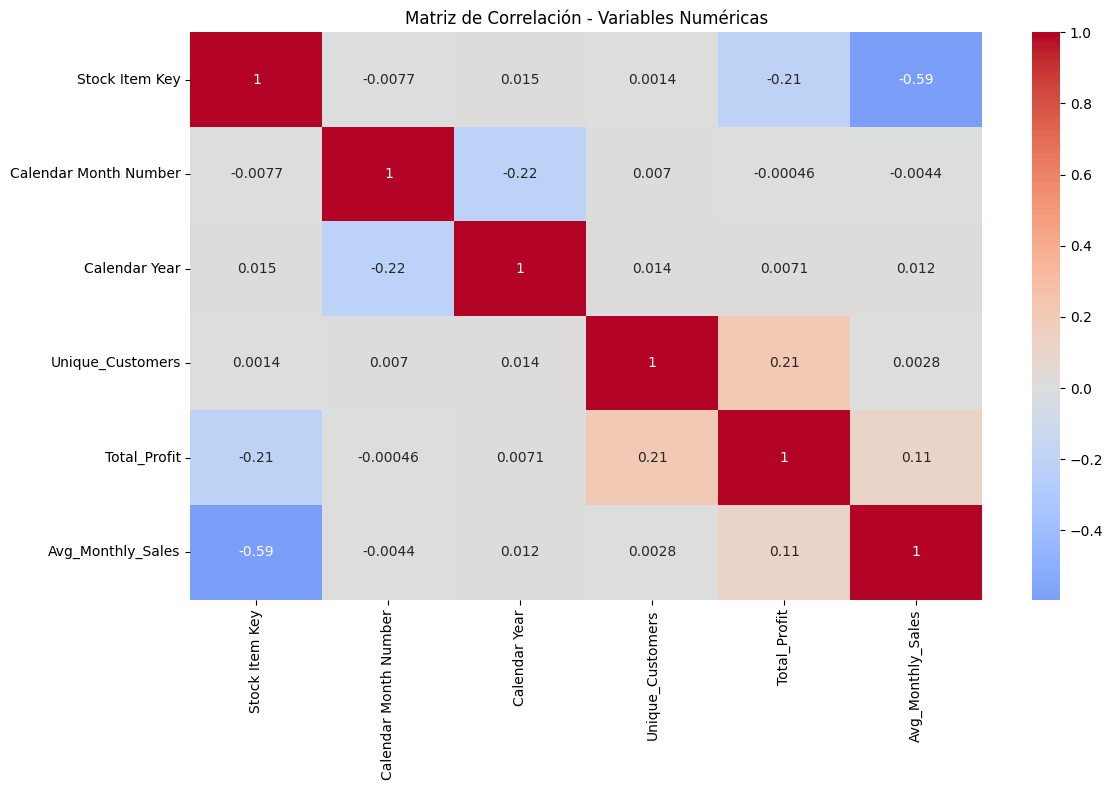

In [7]:
# 7. Matriz de correlación
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

In [8]:
# 8. Preprocesamiento de datos
print("=== Realizando preprocesamiento ===")
resultados = preprocesar_datos(df)

=== Realizando preprocesamiento ===

Verificando valores nulos antes de SMOTE:


In [9]:
# 9. Verificación del preprocesamiento - Distribución de clases
print("=== Distribución de clases en el conjunto de entrenamiento ===")
clases_unicas, conteos = np.unique(resultados['y_train'], return_counts=True)
for clase, conteo in zip(clases_unicas, conteos):
    print(f"Clase {clase}: {conteo} muestras")

=== Distribución de clases en el conjunto de entrenamiento ===
Clase 0: 39870 muestras
Clase 1: 39638 muestras
Clase 2: 39520 muestras
Clase 3: 39752 muestras


In [10]:
# 10. Verificación del preprocesamiento - Formas de los conjuntos
print("=== Formas de los conjuntos de datos ===")
print(f"X_train: {resultados['X_train'].shape}")
print(f"X_test: {resultados['X_test'].shape}")
print(f"y_train: {resultados['y_train'].shape}")
print(f"y_test: {resultados['y_test'].shape}")

=== Formas de los conjuntos de datos ===
X_train: (158780, 9)
X_test: (32926, 9)
y_train: (158780,)
y_test: (32926,)


In [11]:
# 11. Verificación del preprocesamiento - Rango de valores
print("=== Rango de valores después del escalamiento (X_train) ===")
for columna in resultados['X_train'].columns:
    min_val = resultados['X_train'][columna].min()
    max_val = resultados['X_train'][columna].max()
    print(f"{columna}: [{min_val:.2f}, {max_val:.2f}]")

=== Rango de valores después del escalamiento (X_train) ===
Stock Item Key: [1.00, 227.00]
Size: [0.00, 43.00]
Calendar Month Number: [-0.83, 1.00]
Calendar Year: [-0.50, 1.00]
Month: [0.00, 11.00]
State Province: [0.00, 48.00]
Unique_Customers: [0.00, 6.00]
Total_Profit: [-1.71, 2.29]
Avg_Monthly_Sales: [-0.04, 4.11]


In [12]:
# 12. Guardar datos preprocesados
print("=== Guardando datos preprocesados ===")
guardar_datos_preprocesados(resultados)
print("¡Proceso completado con éxito!")

=== Guardando datos preprocesados ===
¡Proceso completado con éxito!
